# Разновидности графиков

Часто используемыми типами графиков в Matplotlib являются:

* линейные и точечные графики [`pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html);
* одно- и двумерные гистограммы [`pyplot.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) и [`pyplot.hist2d`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html);
* диаграммы разбросса [`pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) и диаграмма-ящик [`pyplot.boxplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html);
* и многие-многие другие.

Далее представлены примеры создания графиков различного типа.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Линейные и точечные графики

Предназначены для визуализации функций одного переменного.

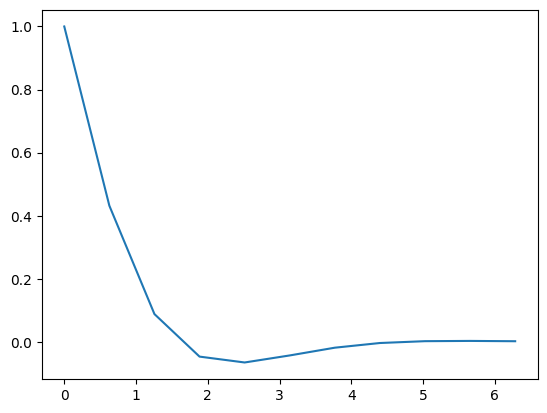

In [3]:
# Данные для графика
x = np.linspace(0, 2*np.pi, 11)
y = np.cos(x) * np.exp(-x)
# Строим график
fig, ax = plt.subplots()
ax.plot(x, y);

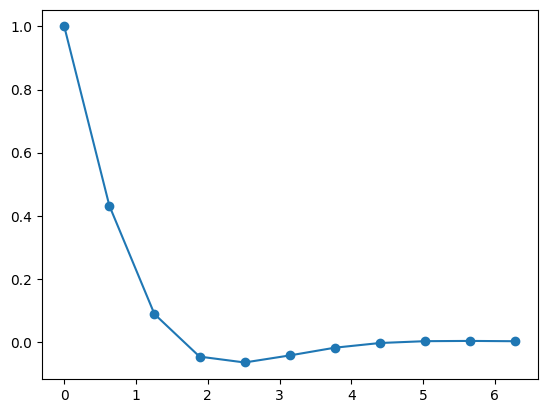

In [4]:
# То же самое, но с отображением точек
fig, ax = plt.subplots()
ax.plot(x, y, marker="o");

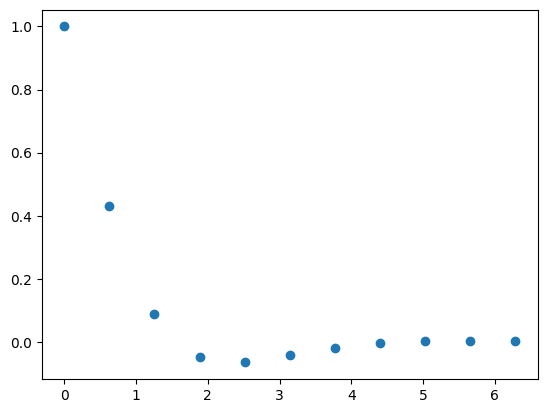

In [5]:
# То же, но без отображения линий (точечный график)
fig, ax = plt.subplots()
ax.plot(x, y, marker="o", ls="");
# "ls" - это linestyle

## Гистограммы

Предназначены для визуализации распределения значений заданных величин.

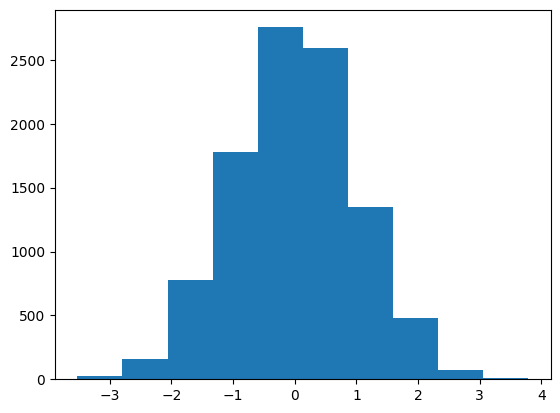

In [6]:
# Данные для графика
rg = np.random.default_rng()
x = rg.normal(size=(10_000))
# График
fig, ax = plt.subplots()
ax.hist(x);

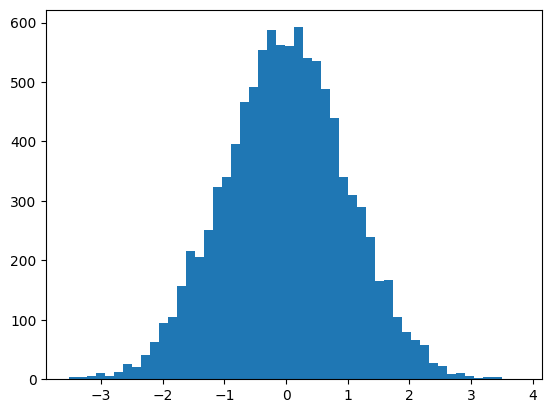

In [7]:
# Увеличим число интервалов
fig, ax = plt.subplots()
ax.hist(x, bins=50);

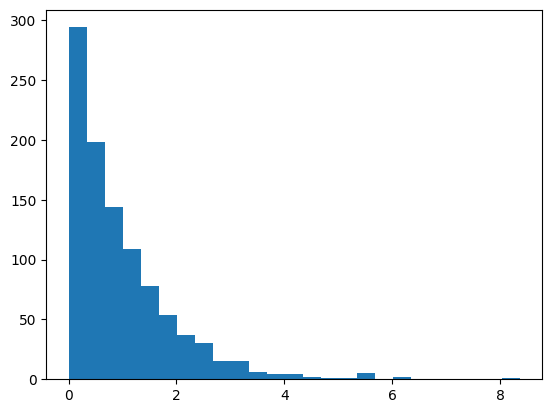

In [8]:
# Другое распределение
x = rg.exponential(size=1_000)
fig, ax = plt.subplots()
ax.hist(x, bins=25);

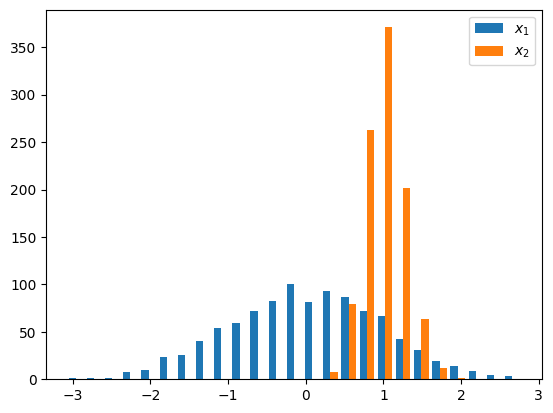

In [9]:
# Две (и более) гистограммы на одном поле
x1 = rg.normal(size=1000)
x2 = rg.normal(1, 0.25, size=1000)
fig, ax = plt.subplots()
ax.hist(
    [x1, x2],
    bins=25,
    label=["$x_1$", "$x_2$"]
)
ax.legend();

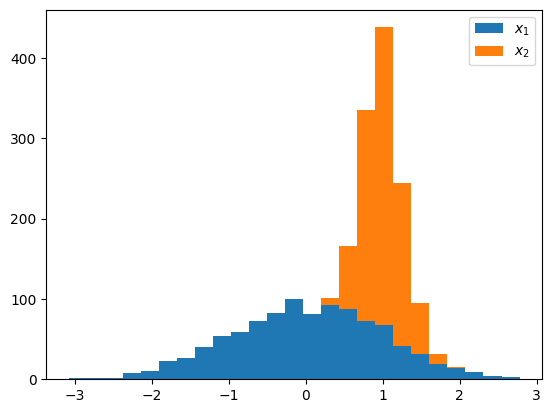

In [10]:
# То же, но в виде стековой гистограммы
fig, ax = plt.subplots()
ax.hist(
    [x1, x2],
    bins=25,
    stacked=True,
    label=["$x_1$", "$x_2$"]
)
ax.legend();

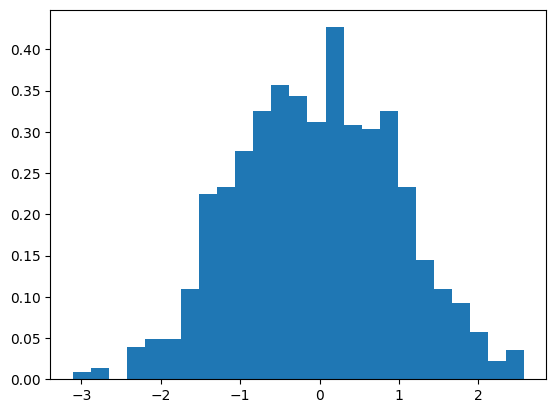

In [11]:
# Гистограмма плотности (распределения)
x = rg.normal(size=1000)
fig, ax = plt.subplots()
ax.hist(x, bins=25, density=True);

Двумерные гистограммы используются для визуализации двумерных распределений.

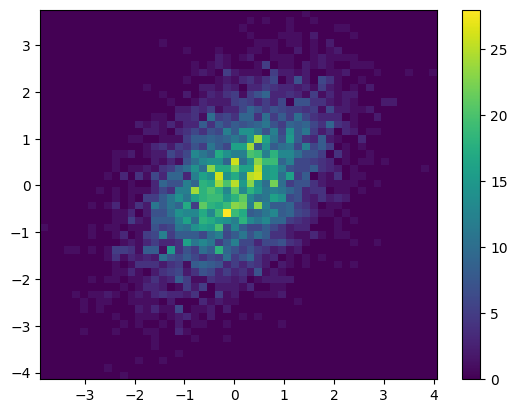

In [22]:
x = rg.normal(size=5000)
y = rg.normal(size=5000) + x/2
fig, ax = plt.subplots()
img = ax.hist2d(x, y, bins=50)[-1]
fig.colorbar(img, ax=ax);

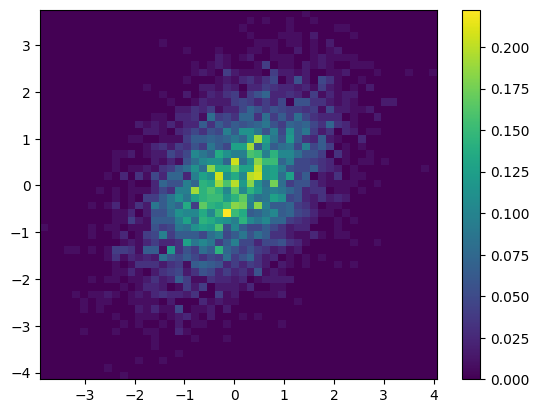

In [23]:
# То же, но плотность
fig, ax = plt.subplots()
img = ax.hist2d(x, y, bins=50, density=True)[-1]
fig.colorbar(img, ax=ax);

## Диаграммы разброса

Используются в основном, как и гистограммы, для анализа распределения и корреляции статистических данных.

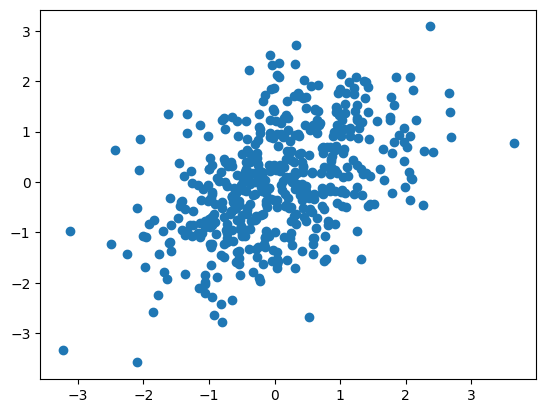

In [28]:
x = rg.normal(size=500)
y = rg.normal(size=500) + x/2
fig, ax = plt.subplots()
ax.scatter(x, y);

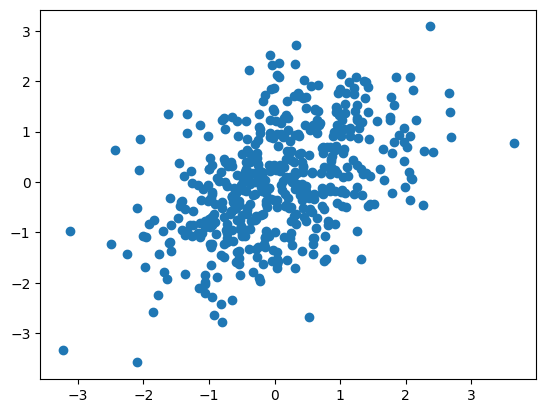

In [30]:
# То же, но как точечный график plot
fig, ax = plt.subplots()
ax.plot(x, y, ls="", marker="o");

Применять `plt.plot` для анализа данных таким образом эффективнее, чем `plt.scatter`, поскольку последний заточен под решение задач, связанных с отображением статистических данных.
С его помощью можно визуализировать следующую _статистику_:

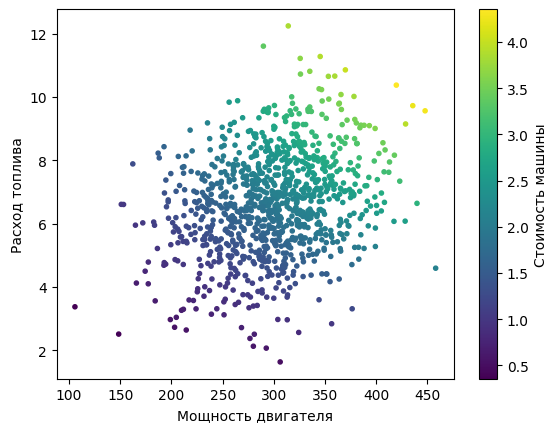

In [34]:
engine_power = rg.normal(300, 50, size=1000)
fuel_consuption = engine_power**(1/3) + rg.normal(scale=1.5, size=1000)
# Цвет точки будет связан со стоимостью машины
car_price = fuel_consuption/10 * engine_power/100
fig, ax = plt.subplots()
img = ax.scatter(
    engine_power, fuel_consuption, c=car_price,
    marker="."
)
fig.colorbar(img, ax=ax, label="Стоимость машины")
ax.set(
    xlabel="Мощность двигателя",
    ylabel="Расход топлива"
);

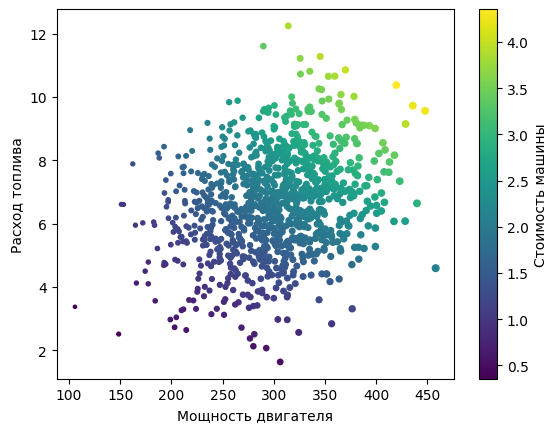

In [42]:
# Заодно отобразим максимальную массу груза
# с помощью размера маркера
max_weight = engine_power
fig, ax = plt.subplots()
img = ax.scatter(
    engine_power, fuel_consuption,
    c=car_price, s=max_weight/20
)
fig.colorbar(img, ax=ax, label="Стоимость машины")
ax.set(
    xlabel="Мощность двигателя",
    ylabel="Расход топлива"
);

## Ящик-диаграмма разброса

Применяется для схожих целей, что и диаграммы разброса и гистограммы.

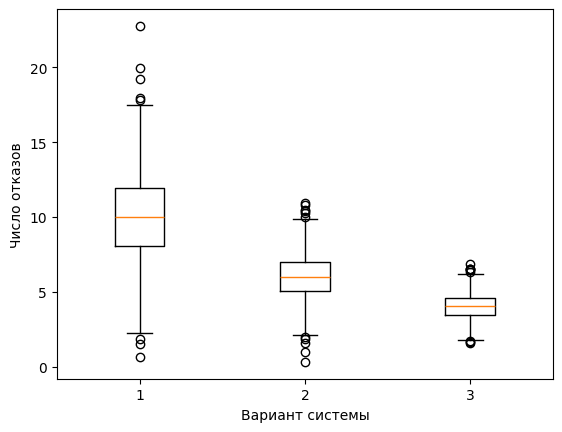

In [47]:
x1 = rg.normal(10, 3, size=1000)
x2 = rg.normal(6, 1.5, size=2000)
x3 = rg.normal(4, 0.8, size=1700)
fig, ax = plt.subplots()
ax.boxplot([x1, x2, x3])
ax.set(
    xlabel="Вариант системы",
    ylabel="Число отказов"
);

Оранжевая линия - это медианное значение.
Снизу ящик ограничивает медиана нижней половины данных, а сверху - медиана верхней половины.
"Усы" имеют длину в полторы интерквартильной ширины, т.е. в 1.5 раза больше высоты коробки.
Точки - это значения, вышедшие за диапазон усов.